<a href="https://colab.research.google.com/github/morbarz/Ex2/blob/main/Ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ex2- Linear Regression, Naive Base, Decision Tree

## Names and IDs

1.   Mor Barzilay 313322380
2.   Niv Sampson 208398511

**Introduction**

This assignment will focus on the linear \ Logistic regression and Decision Trees.
There are two parts: Theoretical and Coding.

# Theoretical



## 1. Decision Tree (15 points)
You will be using a decision tree to classify whether an advertisement was clicked based on its size, position, and whether it played a sound.


1.	Assume that Position is chosen for the root of the decision tree. What is the information gain associated with this attribute? (8 points)
2.	Draw the full decision tree learned from this data (without any pruning). (7 points)


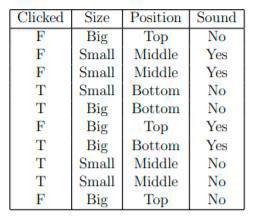

## 2. Naive Base (10 points)
For the same data Using Naïve Base what is the prediction of the new Sample $(big,Middle,No)$.

# 3. Understanding (16 points)
1.  Describe the analytical solution for linear regression with MSE as a distance function. (4 points)
2. What is the problem with information gain? Describe any solution for it. (4 points)
3. Why do we use Gradient Descent or Neotun Roffson for Linear Regression? (4 points)
4. Explain how a Decision tree is used for regression problems. (4 points)

# Code

## Import All Packages
Add all imports needed for this notebook to run

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Titanic Dataset
The famous Titanic dataset includes 1309 passengers with nine attributes.
In the following question, we will use seven features to classify whether this passenger survived.  
Please use the given dataset and not from another source.

# 1.Logistic regression vs classification tree (19 Points)

Make the classification using  models Logistic regression and Decsion tree models.  
Usr sklearn: sklearn.linear_model.LogisticRegression, sklearn.tree.DecisionTreeClassifier

*   Load the data.
*   Deal with missing values. (5 points)
*   Split Train-Test 20:80 using sklearn.model_selection:train_test_split. (3 pints)
*   Apply Logistic regression. (5 points)
*   Apply Descion tree with max_depth=6 (5 points).
*   Calculate the Acuracey using  sklearn.metrics:accuracy_score. (1 points)


In [2]:
#Load Data
URL = 'https://raw.githubusercontent.com/morbarz/Ex2/main/Titanic.csv'
df = pd.read_csv(URL)
df.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,0.0,3.0,2.0,0
1,2,38.0,71.2833,1,1,0.0,1.0,0.0,1
2,3,26.0,7.9250,1,0,0.0,3.0,2.0,1
3,4,35.0,53.1000,1,1,0.0,1.0,2.0,1
4,5,35.0,8.0500,0,0,0.0,3.0,2.0,0


In [6]:
#Q1
#Deal with missing values
# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df_numerical = df.select_dtypes(include=[np.number])  # This selects only numerical columns
df[df_numerical.columns] = imputer.fit_transform(df_numerical)
X = df.drop('Survived', axis=1)
y = df['Survived'] # the target column


# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42) #For logistic regression
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.8, random_state=42)  # For decision tree

#initialize and train the logistic regression model

# Training the decision tree classifier
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)
# Making predictions on the test set
predictions = model.predict(X_test)

#initialize and train the logistic regression model

# Training the decision tree classifier
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X_train_dt, y_train_dt)

# Making predictions on the test set
dt_predictions = clf.predict(X_test_dt)

#Calculate the Acuracey using sklearn.metrics:accuracy_score

#calculating accuracy for logistic regression
logistic_regression_accuracy = accuracy_score(y_test, predictions)
print(f"Logistic Regression Accuracy: {logistic_regression_accuracy:.2f}")

# Calculating accuracy for Dtree
decision_tree_accuracy = accuracy_score(y_test_dt, dt_predictions)
print(f"Decision Tree Accuracy: {decision_tree_accuracy:.2f}")



Logistic Regression Accuracy: 0.82
Decision Tree Accuracy: 0.82


# 2.PreProning (15 Points)
For the same problem described above:
*   Find the best max depth in the range [1,8] of the decision tree using the function sklearn.model_selection.GridSearchCV.


In [7]:
#Q2
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]}
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_dt, y_train_dt)
print("Best parameters:", grid_search.best_params_)



Best parameters: {'max_depth': 5}


# 3.Entropy vs Gini (10 Points)
For the same problem described above:

*   Use max_depth From question 2.
*   Train the model with Entropy. (5 points)
*   Train the model with Gini. (5 points)
*   Using Accuracy score who is better? (5 points)



In [8]:
#Q3

# Split the data into training/testing sets
X_train_ent, X_test_ent, y_train_ent, y_test_ent = train_test_split(X, y, test_size=0.80, random_state=42) #For decision tree(entropy)
X_train_dt_gini, X_test_dt_gini, y_train_dt_gini, y_test_dt_gini = train_test_split(X, y, test_size=0.8, random_state=42)  # For decision tree(gini)

# Initialize the Decision Tree Classifier with entropy
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Fit the model to the training data
clf.fit(X_train_ent, y_train_ent)

# Make predictions on the test set
predictions_entropy = clf.predict(X_test_ent)

# Initialize the Decision Tree Classifier with gini
clf = DecisionTreeClassifier(criterion='gini', max_depth=4)

# Fit the model to the training data
clf.fit(X_train_dt_gini, y_train_dt_gini)

# Make predictions on the test set
predictions_gini = clf.predict(X_test_dt_gini)


#calculating accuracy for logistic regression
decision_tree_with_entropy_accuracy = accuracy_score(y_test_ent, predictions_entropy)
print(f"Decision Tree With entropy Accuracy: {decision_tree_with_entropy_accuracy:.2f}")
# Calculating accuracy for Dtree
decision_tree_with_gini_accuracy = accuracy_score(y_test_dt_gini, predictions_gini)
print(f"Decision Tree With gini Accuracy: {decision_tree_with_gini_accuracy:.2f}")



#in this excersice, Desicion Tree with entropy have better accuracy rate!

Decision Tree With entropy Accuracy: 0.84
Decision Tree With gini Accuracy: 0.83


# 4. Gradient Descent (15 points)

* Assume we have $𝑓(𝑥,𝑦) = 𝑥^2/9+𝑦^2/64$
* Use gradient descent to find local minima, start at $(8.5,8.6)$
* Make 1000 Iteration.

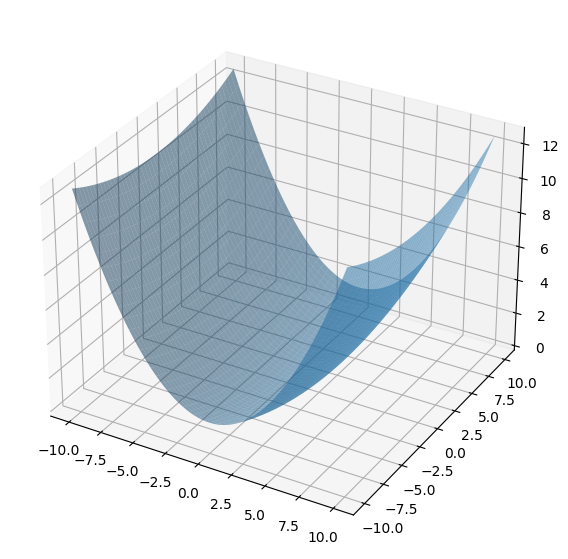

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def func(x,y):
  return np.power(x,2)/9 + np.power(y,2)/64

x = y = np.arange(-10, 10, 0.005)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)
fig = plt. figure(figsize=(7, 7))
ax = plt.axes (projection='3d' )
ax. plot_surface(X, Y, Z, alpha=0.5)

In [14]:
#Q4
#initial points
x0=8.5
y0=8.6


def gradient_of_func(x, y):
      #Calculate Gradient of the function with respect to x and y
      grad_x = (2 * x) / 9
      grad_y = (2 * y) / 64
      return grad_x, grad_y

def gradient_descent(x0, y0, iterations = 1000, learning_rate = 0.01):
# Estimation of optimal parameters
  x = x0
  y = y0
#stopping_thresholds parameter:
  #//stopping_threshold=0.0000000001
  prev_x_and_y = [(x,y)]
  previous_cost=func(x, y)

  for i in range(iterations):
    f_grad_x , f_grad_y = gradient_of_func(x,y)


    x -= learning_rate * f_grad_x
    y -= learning_rate * f_grad_y
    current_cost=func(x,y)
    # If the change in cost is less than or equal to
    # stopping_threshold we stop the gradient descent
   # if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
    #   break

    #previous_cost = current_cost
    prev_x_and_y.append((x,y))

    if i % 100 == 0:
      print(f"Iteration {i}: x={x}, y={y}, f(x, y)={func(x, y)}")

  return x, y, prev_x_and_y


# Performing gradient descent
final_x, final_y, prev_x_and_y = gradient_descent(x0, y0, learning_rate=0.1)

print(f"Final x: {final_x}, Final y: {final_y}, Final f(x, y): {func(final_x, final_y)}")

#the bigger we make the learning rate,the closer we get to the minime(0,0)



Iteration 0: x=8.311111111111112, y=8.573125, f(x, y)=8.823365618176455
Iteration 100: x=0.8783656821667242, y=6.269163980790976, f(x, y)=0.6998254071967853
Iteration 200: x=0.09283070112933067, y=4.584374661287102, f(x, y)=0.32934017676402694
Iteration 300: x=0.0098108785977449, y=3.352359437310426, f(x, y)=0.17560934789237065
Iteration 400: x=0.001036869674458128, y=2.4514387734987224, f(x, y)=0.09389937039624041
Iteration 500: x=0.00010958230815923292, y=1.7926335682650842, f(x, y)=0.05021148742910996
Iteration 600: x=1.1581284087395711e-05, y=1.3108771652022175, f(x, y)=0.02684998348753731
Iteration 700: x=1.223976236365343e-06, y=0.9585890684350367, f(x, y)=0.014357703158340698
Iteration 800: x=1.29356798078852e-07, y=0.7009756722563723, f(x, y)=0.0076776077046155
Iteration 900: x=1.3671165102766142e-08, y=0.5125938833179718, f(x, y)=0.004105507643984373
Final x: 1.4776842233560911e-09, Final y: 0.3760132842861056, Final f(x, y): 0.00220915609311912
